# Detectron2 Tutorial
Translated and Updated by [visionNoob](https://github.com/visionNoob)  
([원문](https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=roTj1N9F5uJ5)에서 내용이 각색되었습니다. 특히 Object Detection 관련 내용이 추가되었습니다)

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Detectron2에 오신것을 환영합니다! 이 튜토리얼 문서에서는 Detectron2의 기본적인 사용법을 다룹니다! 다루는 내용은 아래과 같습니다.

* Pretrained Model을 이미지와 비디오에 적용해보기
* 커스텀 데이터셋으로 detectron2 모델 학습시키기 

이 튜토리얼 문서를 활용해서 다양한 시도를 해보시기 바랍니다. 

# Chapter 1: Detectron2 설치하기

In [1]:
# 종속 패키지(dependencies) 설치
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

     |████████████████████████████████| 831.4 MB 6.5 kB/s 
     |████████████████████████████████| 22.1 MB 1.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.9.1 which is incompatible.
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-z35fy57d
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-z35fy57d
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-re

'1.9.1+cu102'

In [2]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 13167, done.
remote: Counting objects: 100% (668/668), done.
remote: Compressing objects: 100% (339/339), done.
remote: Total 13167 (delta 389), reused 531 (delta 325), pack-reused 12499
Receiving objects: 100% (13167/13167), 5.67 MiB | 13.39 MiB/s, done.
Resolving deltas: 100% (9349/9349), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 145 kB 8.7 MB/s 
     |████████████████████████████████| 130 kB 74.8 MB/s 
     |████████████████████████████████| 743 kB 77.1 MB/s 
     |████████████████████████████████| 747 kB 62.1 MB/s 
     |████████████████████████████████| 112 kB 75.5 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=c5d1fcce24c3ada1a1b1c4c90e498272f8b1854404ca3b09ee2d627e86309e0a
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4

In [3]:
# 인스톨이 완료되면 Colab Runtime을 다시 시작해주세요. 

# 기본 설정
# detectron2 logger 설정
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# 자주 사용하는 라이브러리 임폴트
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# 자주 사용하는 detectron2 유틸 임폴트 
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("data4", {}, "/content/drive/MyDrive/Colab Notebooks/result.json", 
                                            "/content/drive/MyDrive/Colab Notebooks/jpgimg")

In [13]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/retinanet_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("data4",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/retinanet_R_50_FPN_3x/137849486/model_final_4cafe0.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER =3000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

Loading config ./detectron2_repo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[10/03 11:22:31 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

In [14]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1   # set the testing threshold for this model
cfg.DATASETS.TEST = ("dat",)
predictor = DefaultPredictor(cfg)

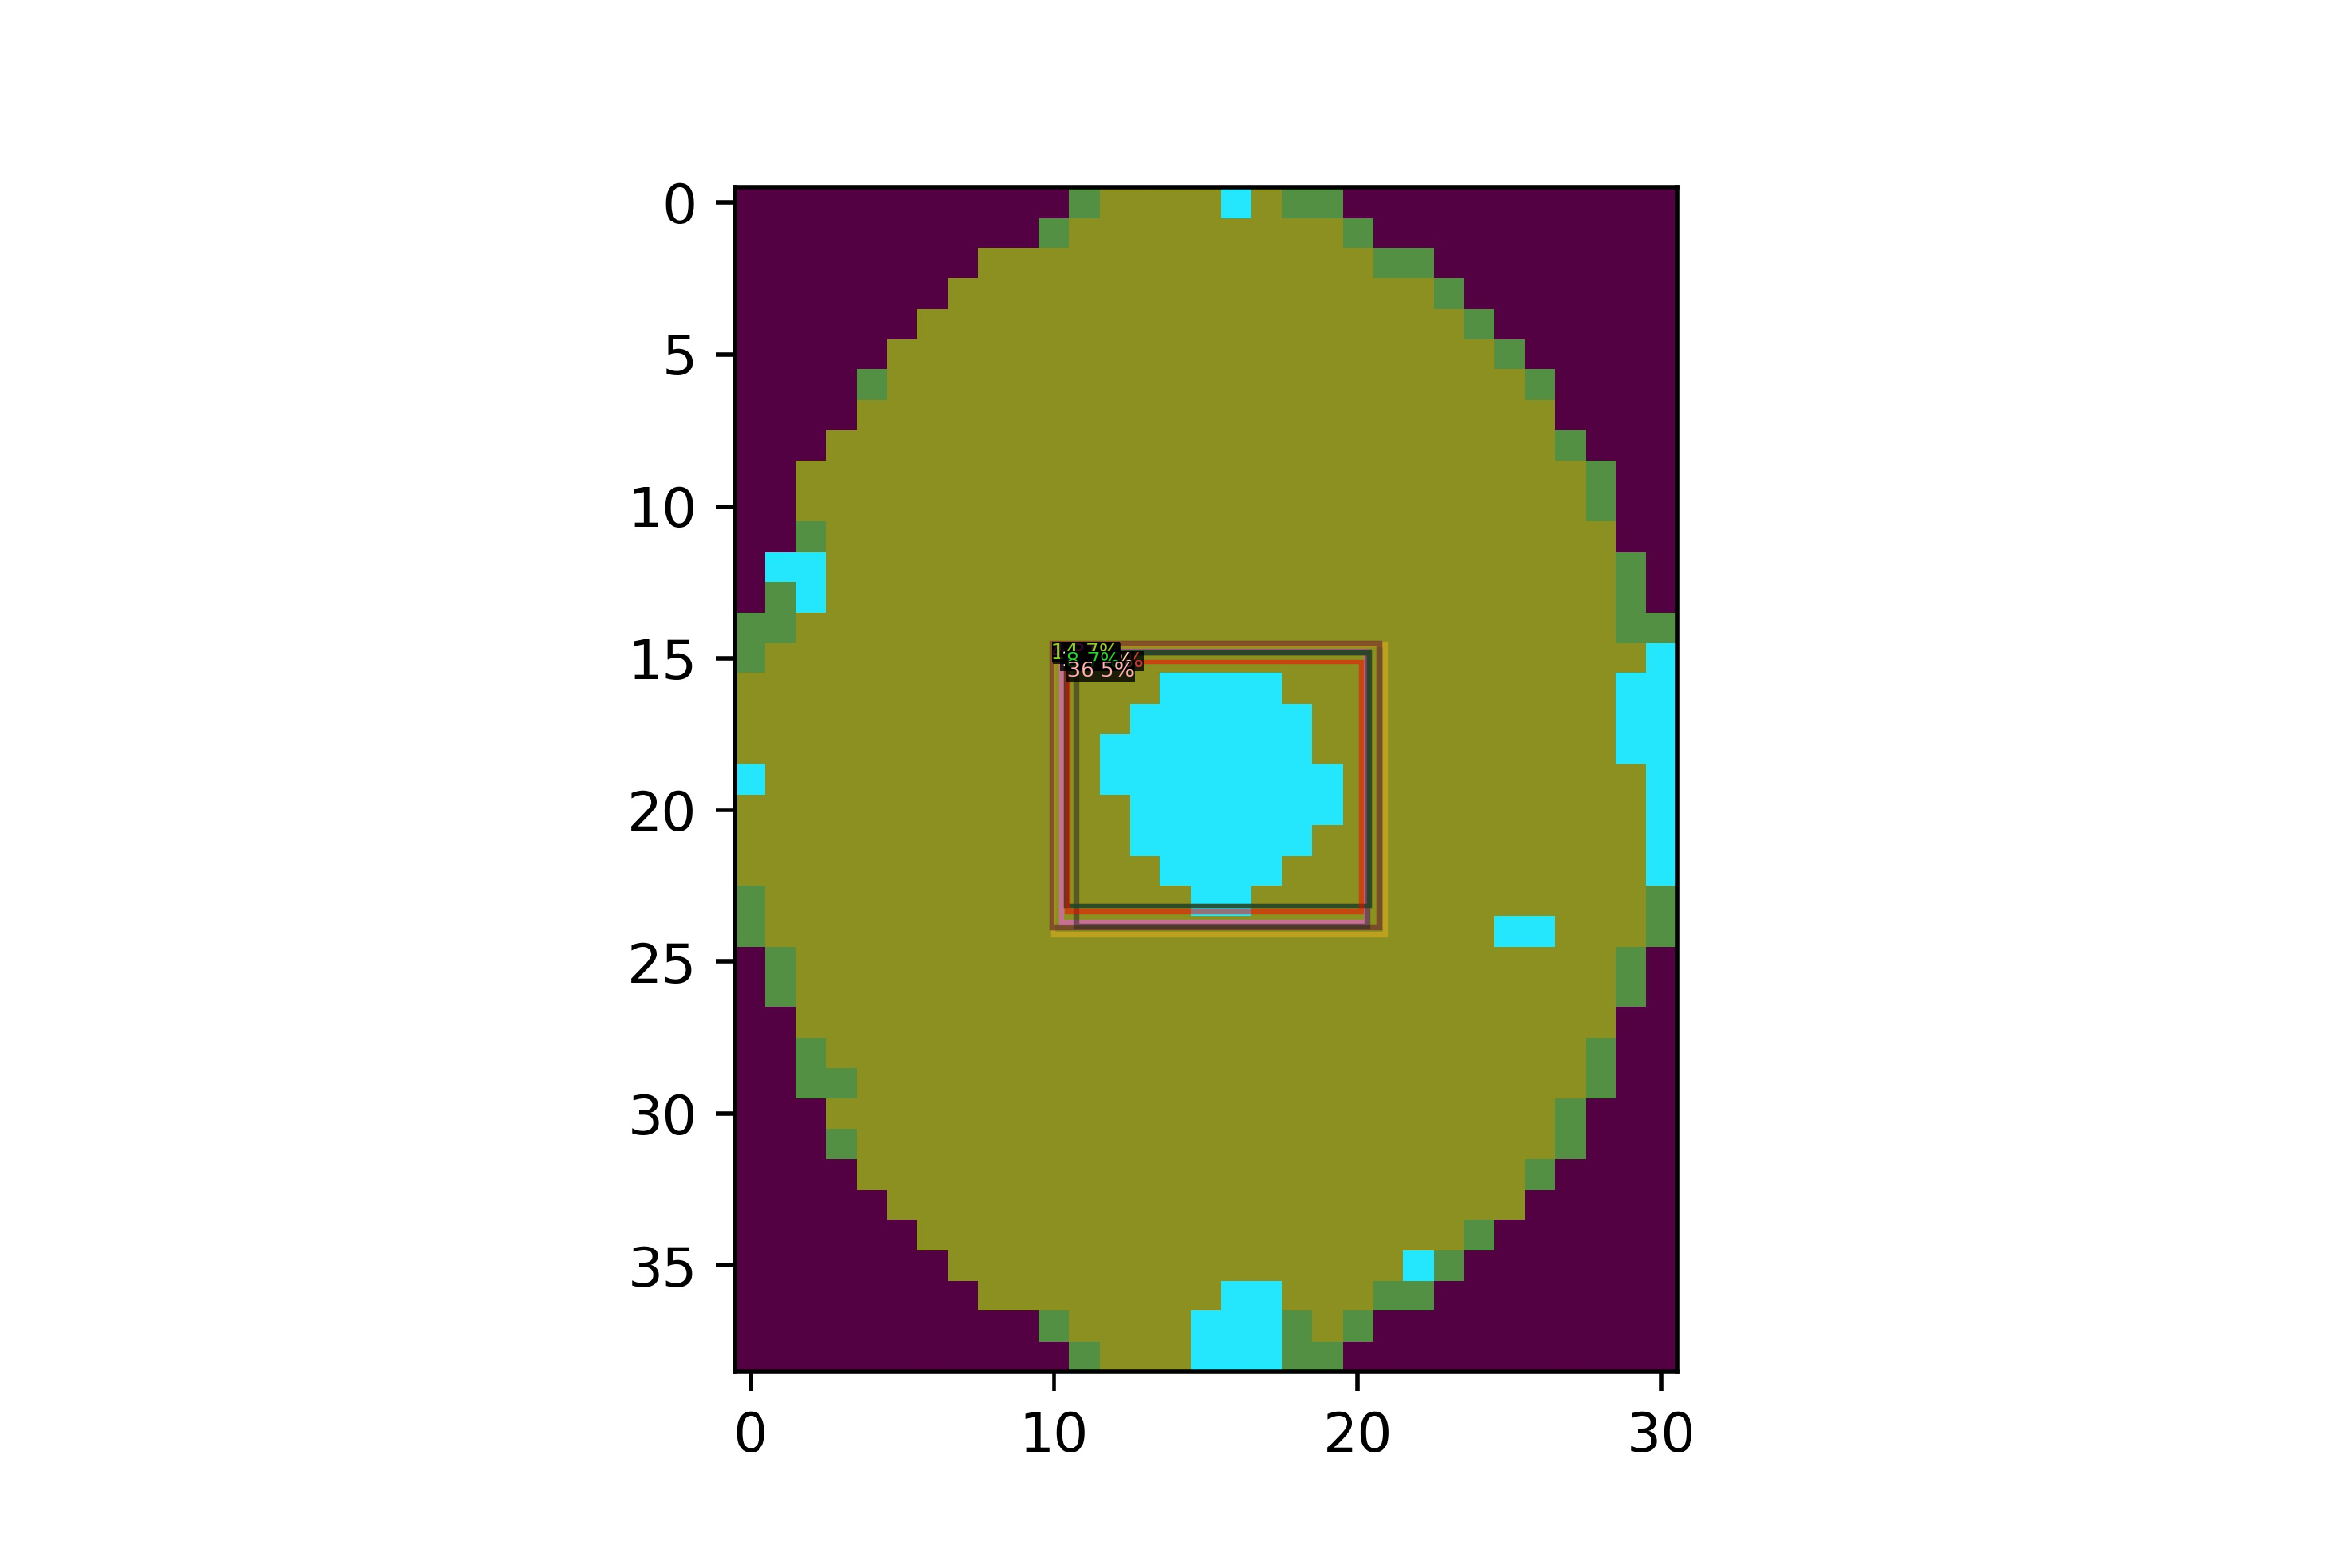

In [15]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/testimg/center83.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [16]:
outputs

{'instances': Instances(num_instances=9, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[1342.8154,  821.1735, 1765.9352, 1191.6964],
         [1341.5586,  819.6271, 1759.0220, 1182.5077],
         [1359.8655,  830.8438, 1746.8130, 1155.2759],
         [1371.9629,  830.8130, 1743.5065, 1180.9529],
         [1341.5586,  819.6271, 1759.0220, 1182.5077],
         [1359.8655,  830.8438, 1746.8130, 1155.2759],
         [1359.8655,  830.8438, 1746.8130, 1155.2759],
         [1361.2708,  843.8633, 1736.2329, 1163.0831],
         [1353.8726,  830.4511, 1742.6857, 1176.5402]], device='cuda:0')), scores: tensor([0.8093, 0.3149, 0.1996, 0.0997, 0.0742, 0.0713, 0.0687, 0.0538, 0.0534],
        device='cuda:0'), pred_classes: tensor([ 0,  4,  2,  3, 14,  5,  8, 36,  1], device='cuda:0')])}

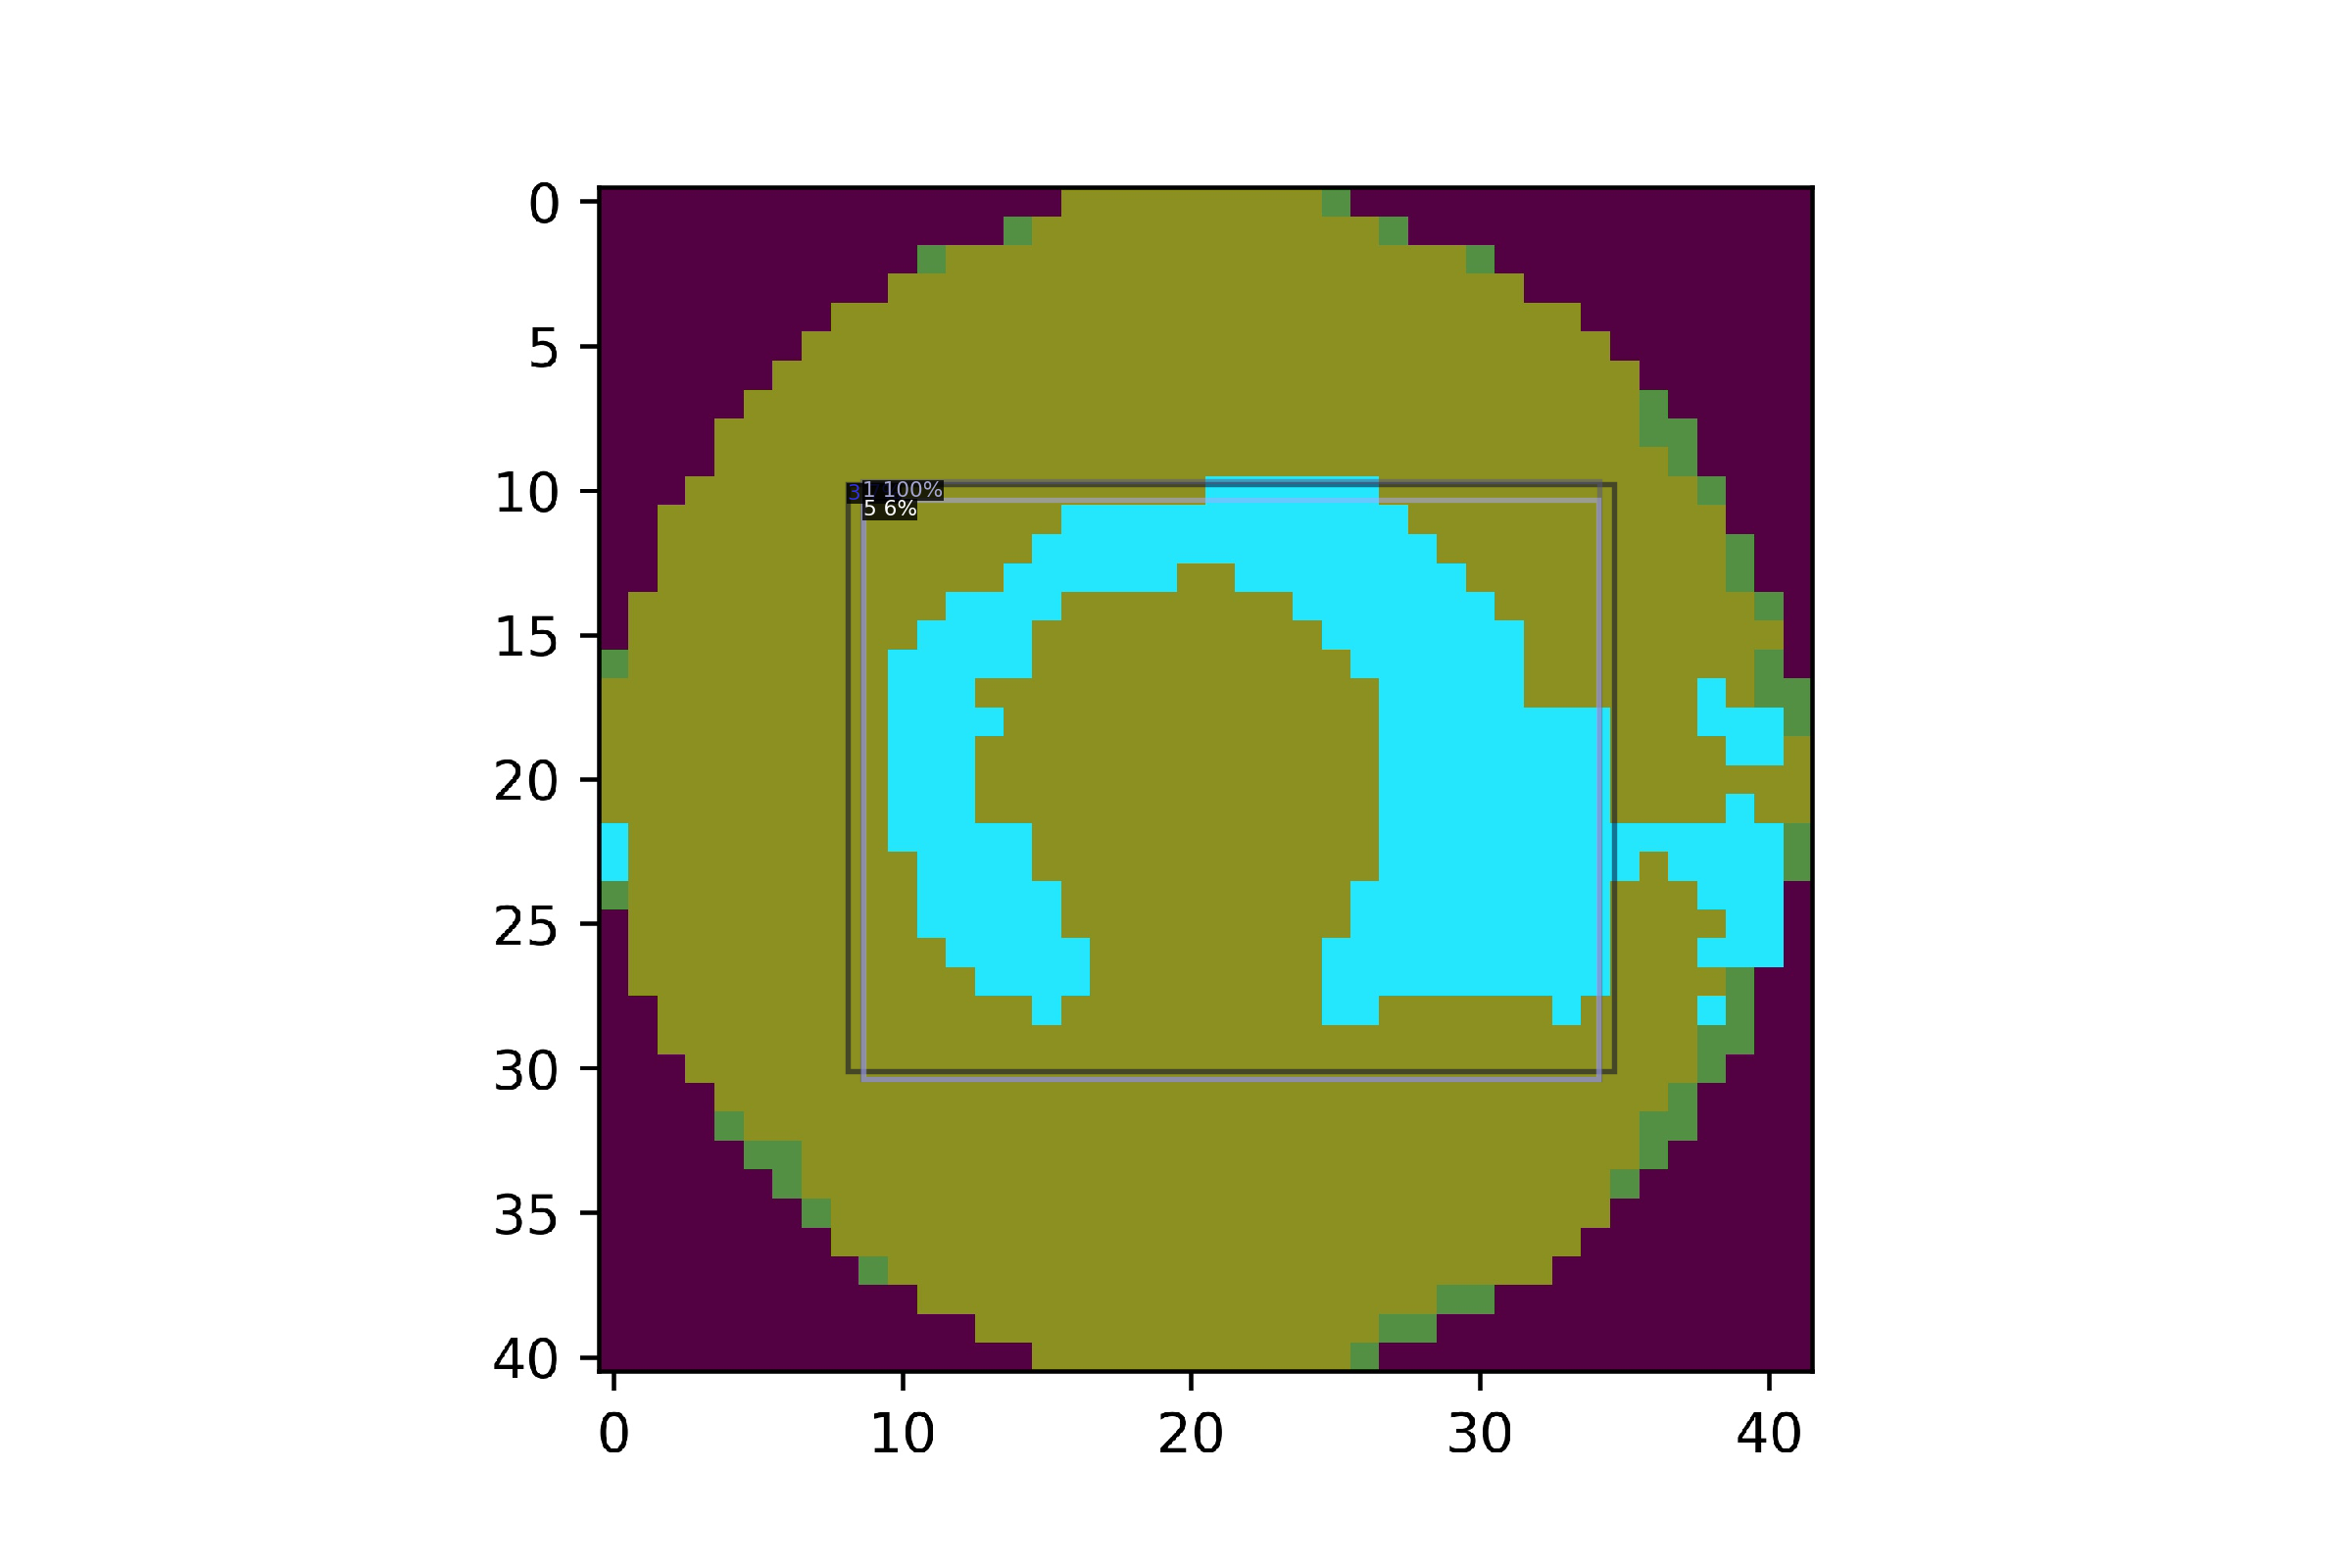

In [17]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/testimg/donut92.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [12]:
outputs

{'instances': Instances(num_instances=38, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[1136.1115,  590.7984, 2056.2375, 1376.1099],
         [1141.7185, 1013.7151, 1417.2444, 1323.8617],
         [1108.2150,  724.1487, 1409.0408, 1328.0873],
         [1092.2781,  593.8022, 2144.0015, 1451.1025],
         [1127.3597,  622.7766, 2050.3062, 1397.1814],
         [1112.9823,  787.0120, 1419.2405, 1324.3958],
         [1127.3597,  622.7766, 2050.3062, 1397.1814],
         [1141.7185, 1013.7151, 1417.2444, 1323.8617],
         [1656.6151, 1063.5570, 2083.2173, 1337.4962],
         [1092.2781,  593.8022, 2144.0015, 1451.1025],
         [1099.8020,  759.9877, 1411.5040, 1328.0605],
         [1632.0143,  838.6279, 2111.9802, 1353.9308],
         [1121.6503, 1047.3345, 1428.6787, 1354.4170],
         [1650.6957,  842.8556, 2102.7620, 1339.0723],
         [1156.0308,  600.7448, 2059.2864, 1381.1091],
         [1099.3618,  600.9374, 1627.2698, 1290.6799],
         [1127.7

Center :0, Donut : 1, Edge-Loc : 2, Edge-Ring : 3, Loc : 4, Near-full : 5,Random : 6,Scratch : 7, none : 8

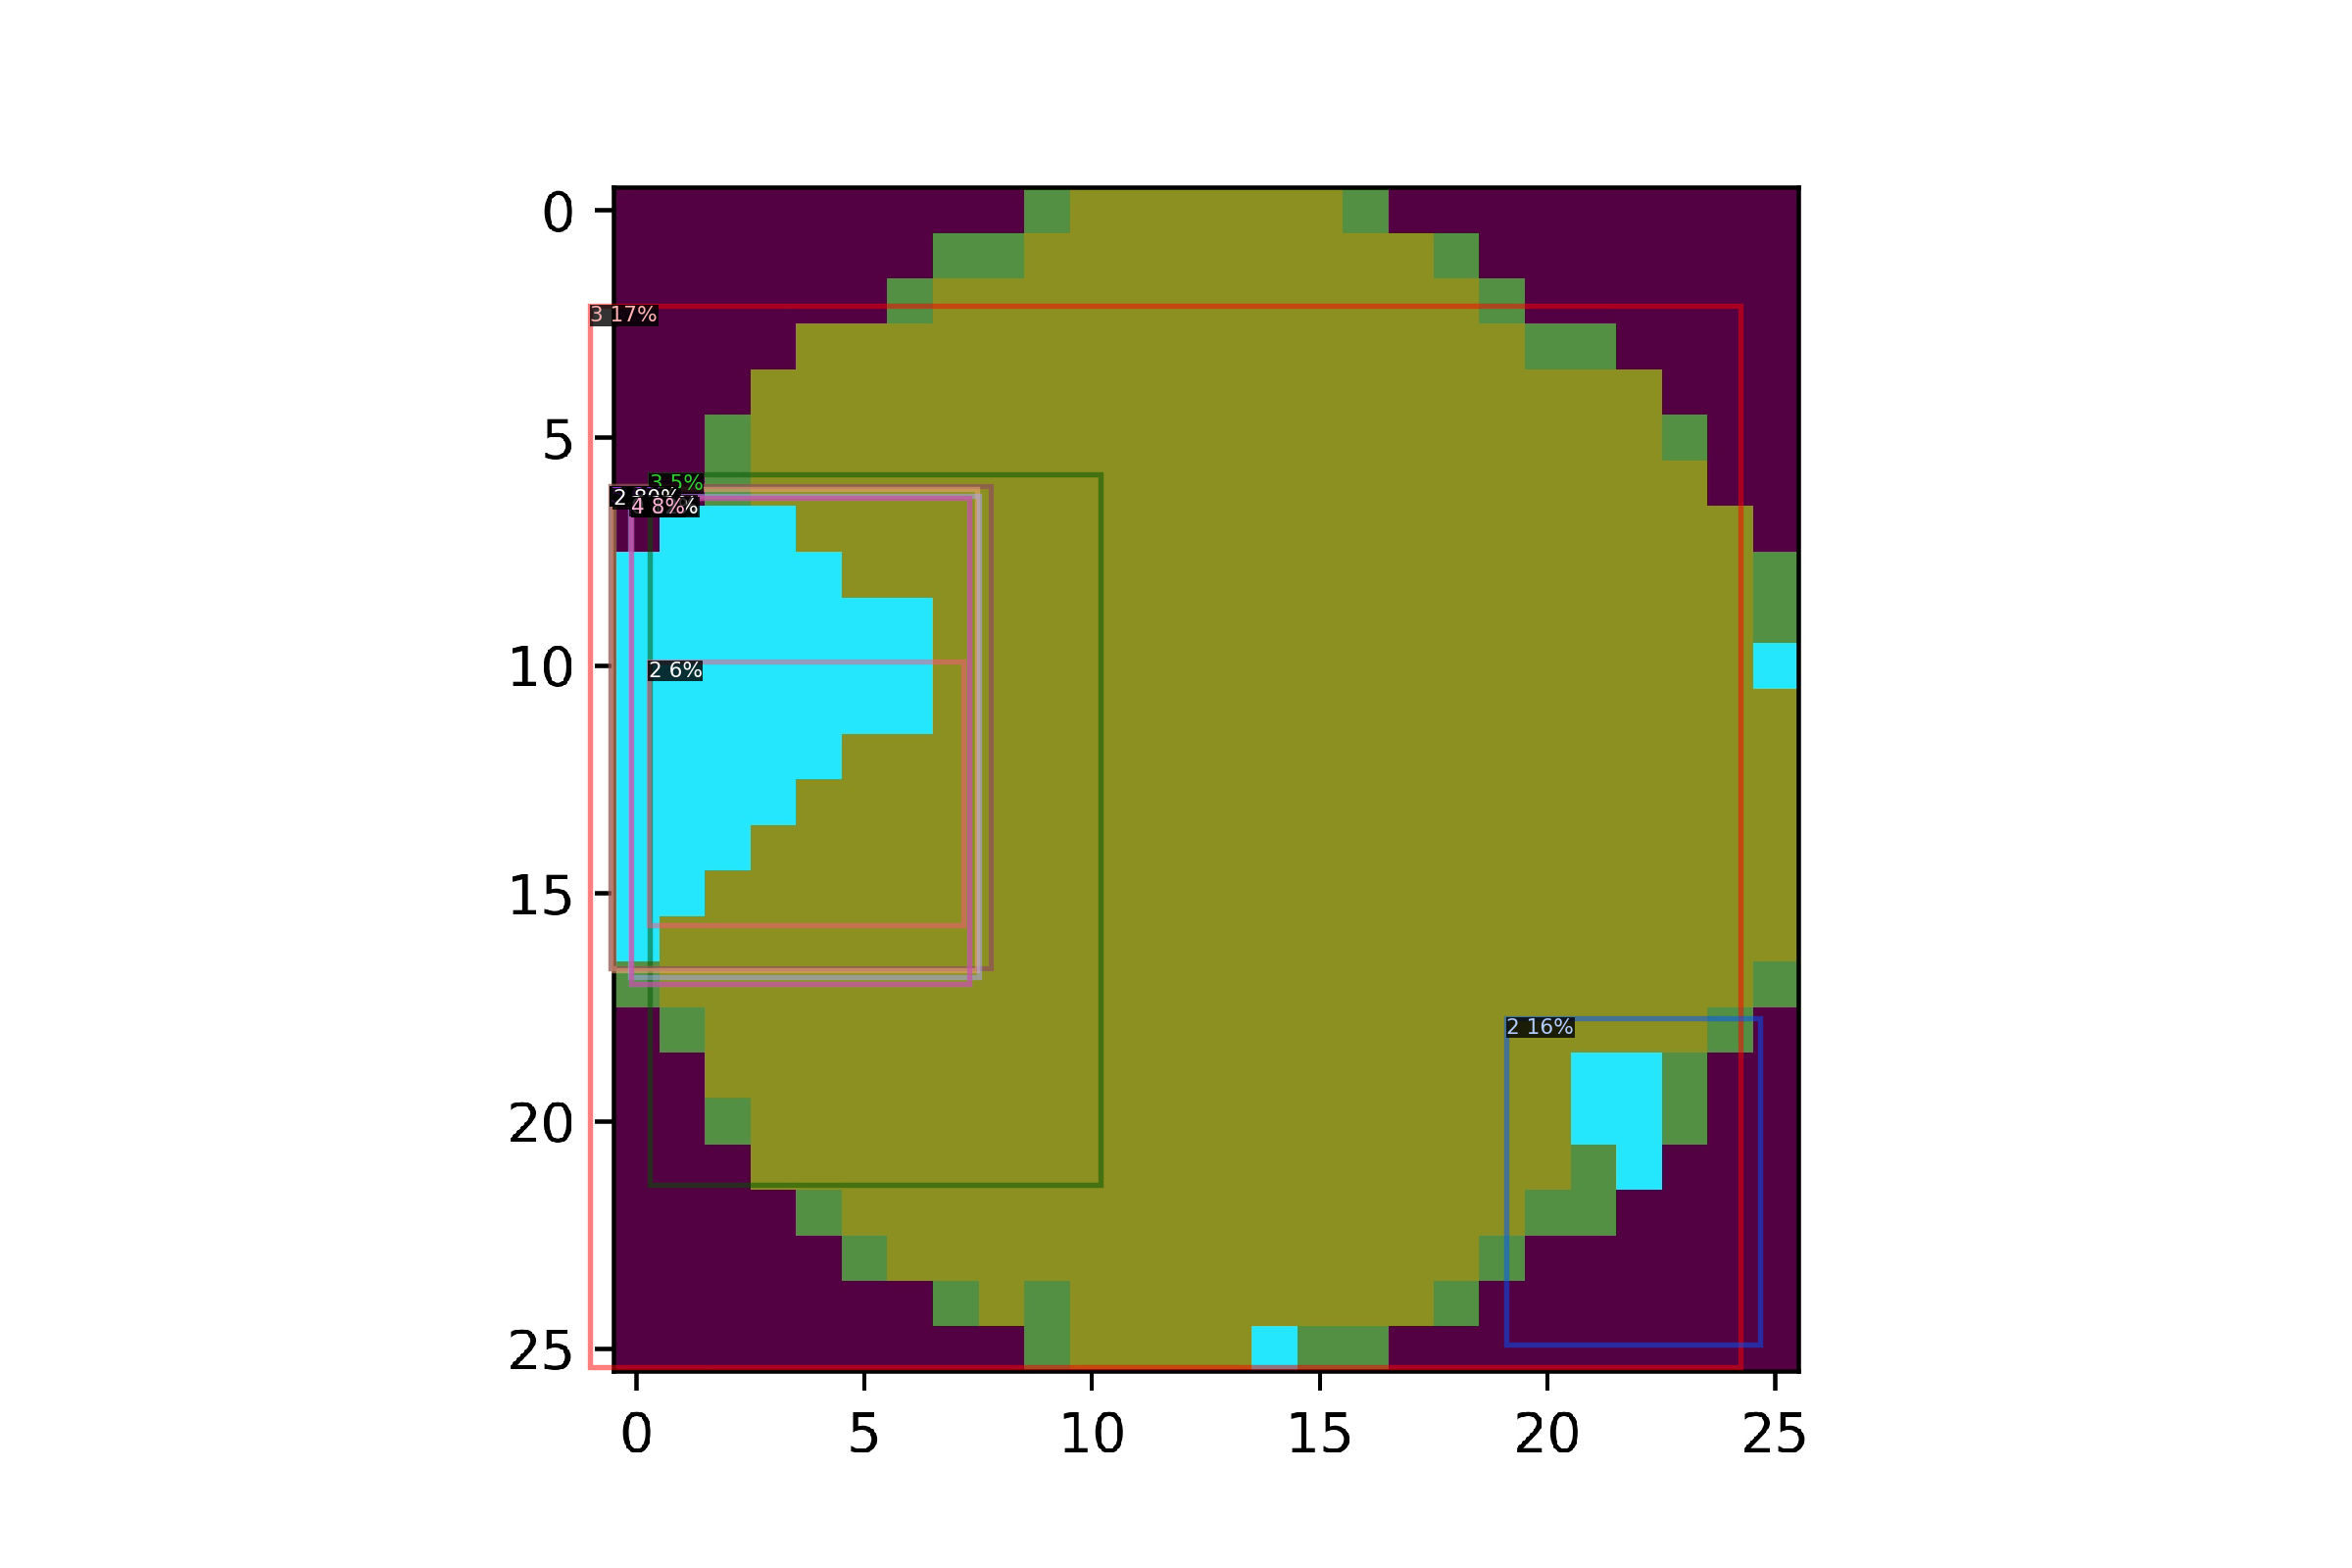

In [18]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/testimg/edge_loc230.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [19]:
outputs

{'instances': Instances(num_instances=10, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[ 782.5413,  623.7853, 1246.8217, 1237.5747],
         [ 753.1068,  390.0457, 2219.7056, 1743.7881],
         [1921.6570, 1298.4878, 2244.6340, 1715.1166],
         [ 778.4760,  620.6205, 1263.2789, 1234.8268],
         [ 805.2662,  634.4921, 1235.8035, 1254.9624],
         [ 803.6028,  632.3673, 1248.1851, 1246.7760],
         [ 805.2662,  634.4921, 1235.8035, 1254.9624],
         [ 778.4760,  620.6205, 1263.2789, 1234.8268],
         [ 827.1542,  843.2596, 1228.6281, 1179.8013],
         [ 828.4595,  604.5759, 1403.2067, 1511.5974]], device='cuda:0')), scores: tensor([0.7995, 0.1720, 0.1641, 0.1252, 0.1236, 0.1059, 0.0847, 0.0602, 0.0560,
         0.0535], device='cuda:0'), pred_classes: tensor([2, 3, 2, 7, 0, 3, 4, 5, 2, 3], device='cuda:0')])}

Center :0, Donut : 1, Edge-Loc : 2, Edge-Ring : 3, Loc : 4, Near-full : 5,Random : 6,Scratch : 7, none : 8



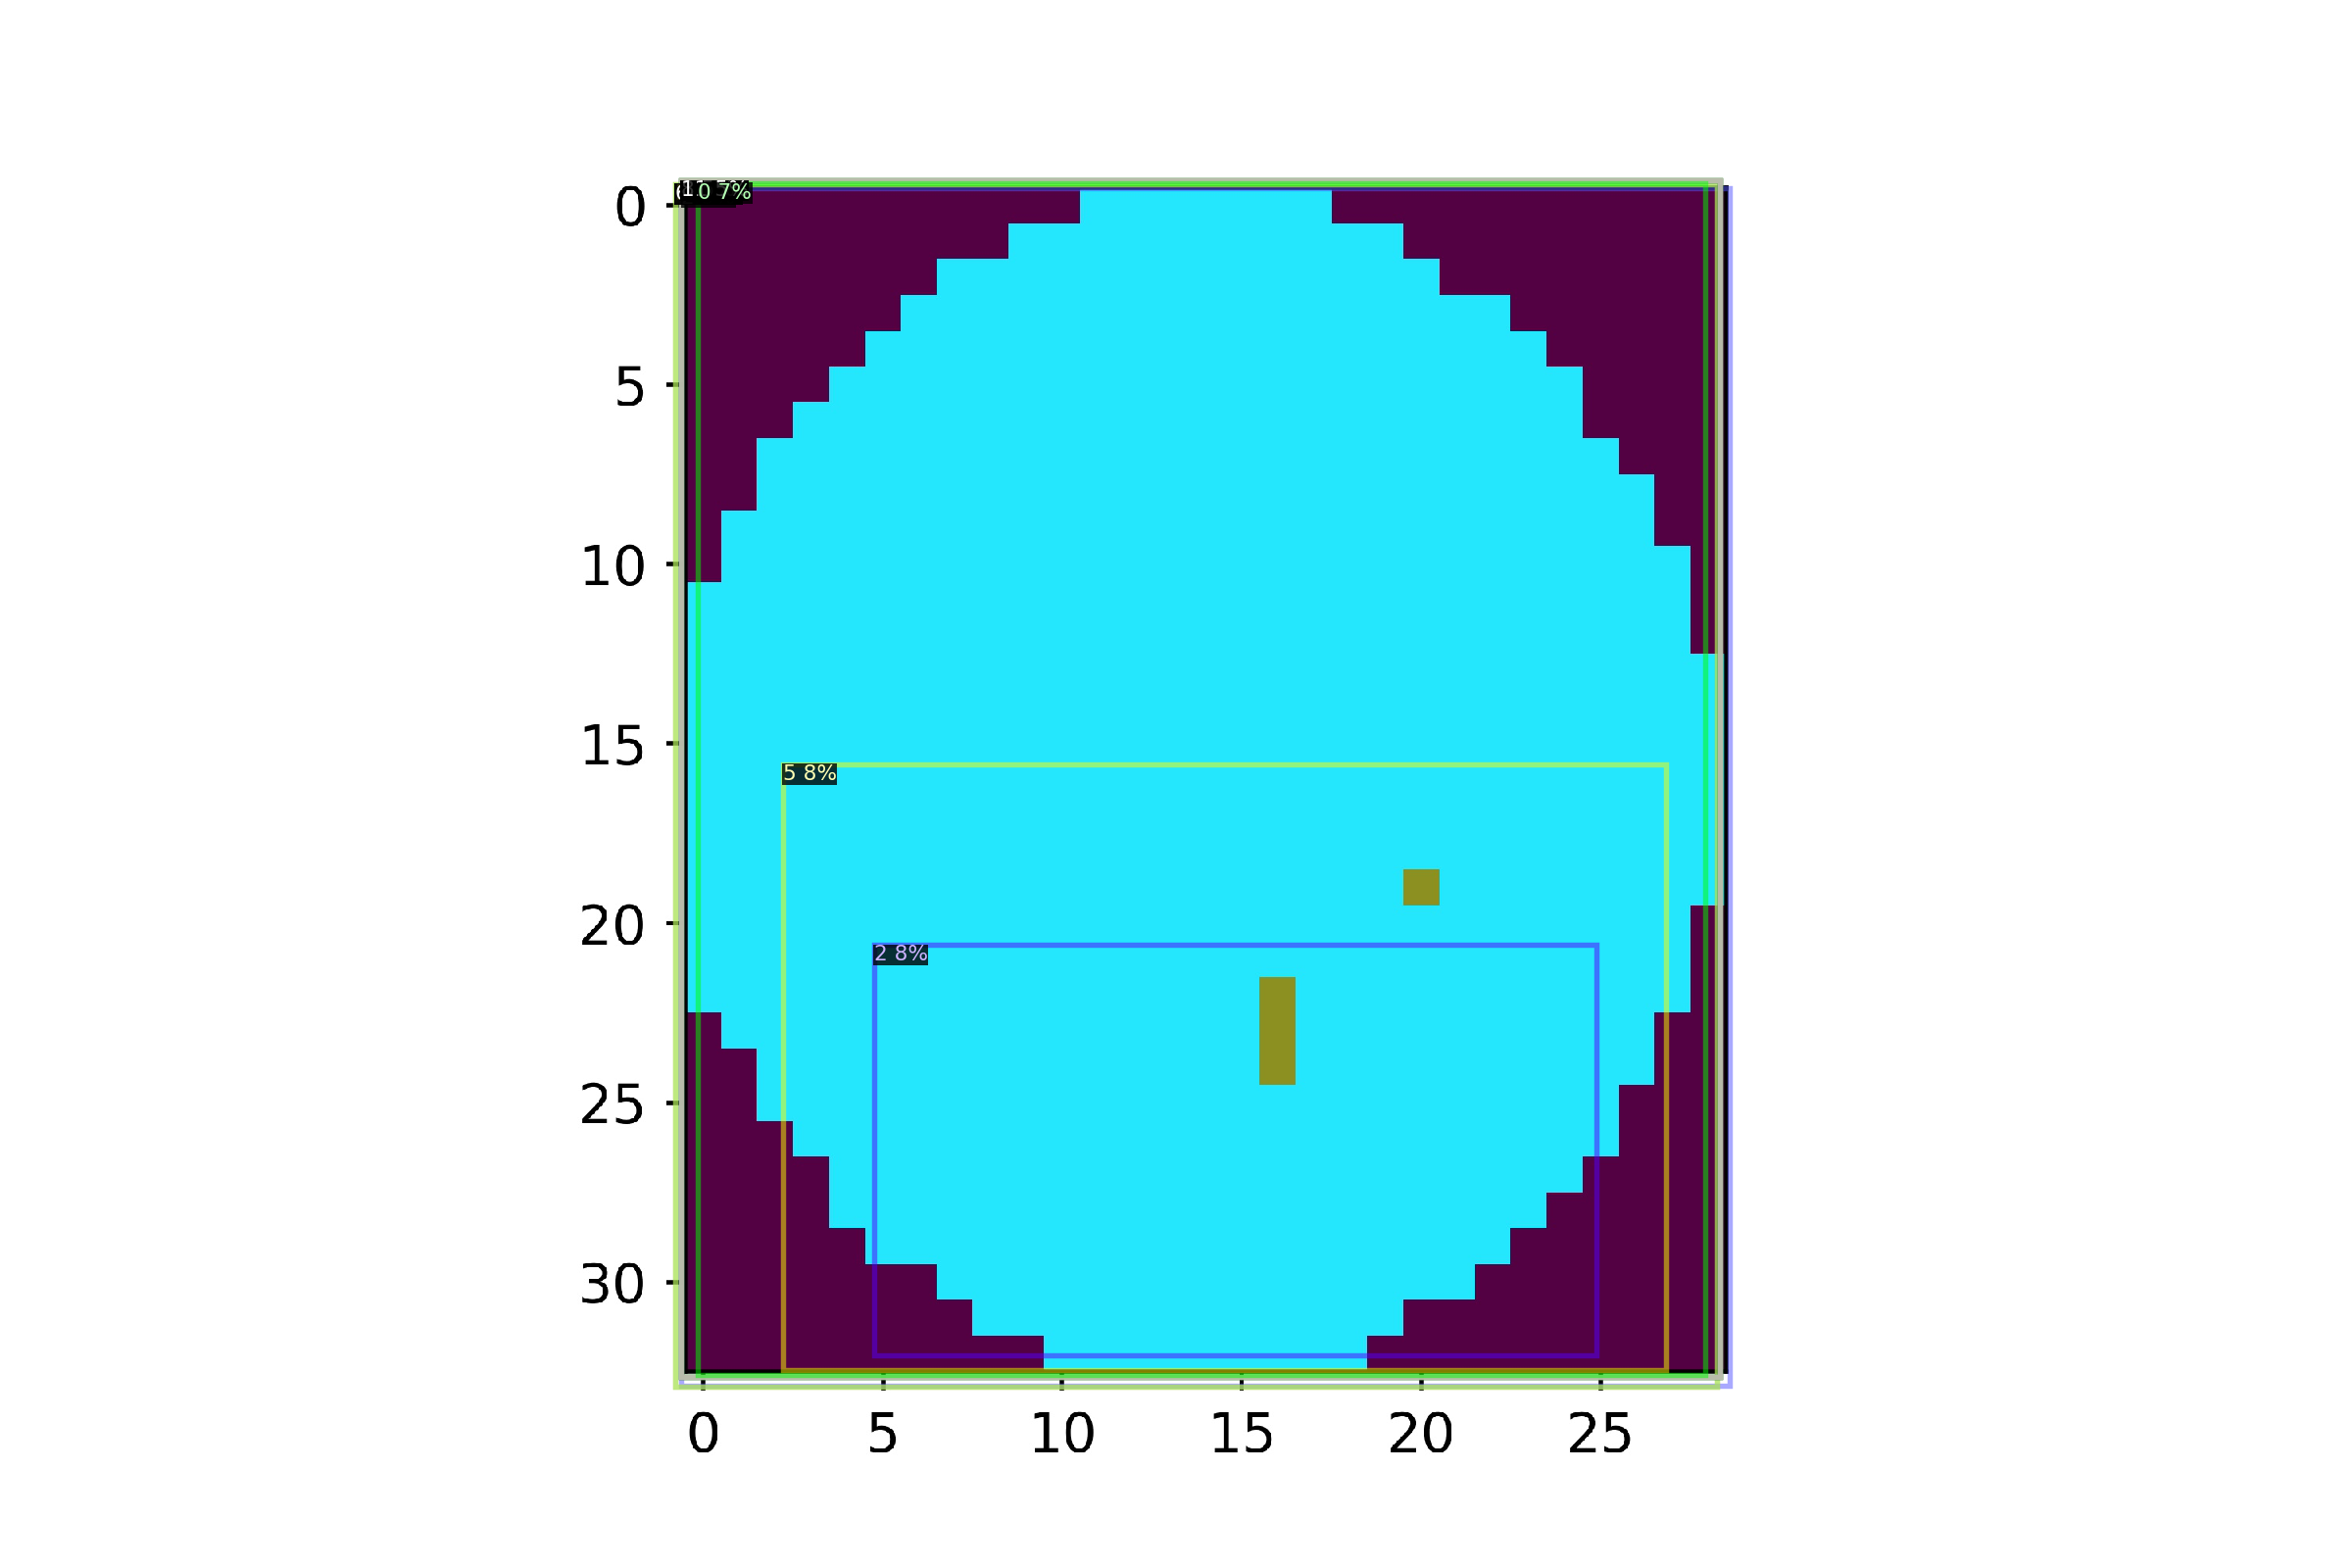

In [21]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/testimg/nearfull (1).jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
outputs

{'instances': Instances(num_instances=12, image_height=933, image_width=1880, fields=[pred_boxes: Boxes(tensor([[1370.7318,  388.3628, 1464.8306,  480.5727],
         [ 824.3143,  164.9933,  971.9234,  292.3133],
         [1452.6279,  443.2246, 1638.0476,  542.7292],
         [ 718.5240,  588.3859,  941.2347,  769.6617],
         [1245.5026,  252.8015, 1358.7697,  458.5186],
         [ 853.3536,  197.2599,  957.7669,  286.2882],
         [1261.3698,  304.5778, 1352.5023,  512.8195],
         [1246.0192,  252.0250, 1361.1609,  445.6836],
         [ 717.5932,  590.0302,  940.2045,  769.4343],
         [ 621.3404,  536.5182,  988.3497,  761.1813],
         [1247.5004,  243.9761, 1355.7527,  482.0755],
         [ 894.7827,  210.0436,  966.3706,  300.2679]], device='cuda:0')), scores: tensor([0.9920, 0.9904, 0.9852, 0.9839, 0.9408, 0.1480, 0.0853, 0.0678, 0.0623,
         0.0618, 0.0583, 0.0538], device='cuda:0'), pred_classes: tensor([3, 0, 4, 1, 2, 0, 2, 0, 3, 1, 7, 0], device='cuda:0')])

In [ ]:
Center :0, Donut : 1, Edge-Loc : 2, Edge-Ring : 3, Loc : 4, Near-full : 5,Random : 6,Scratch : 7, none : 8

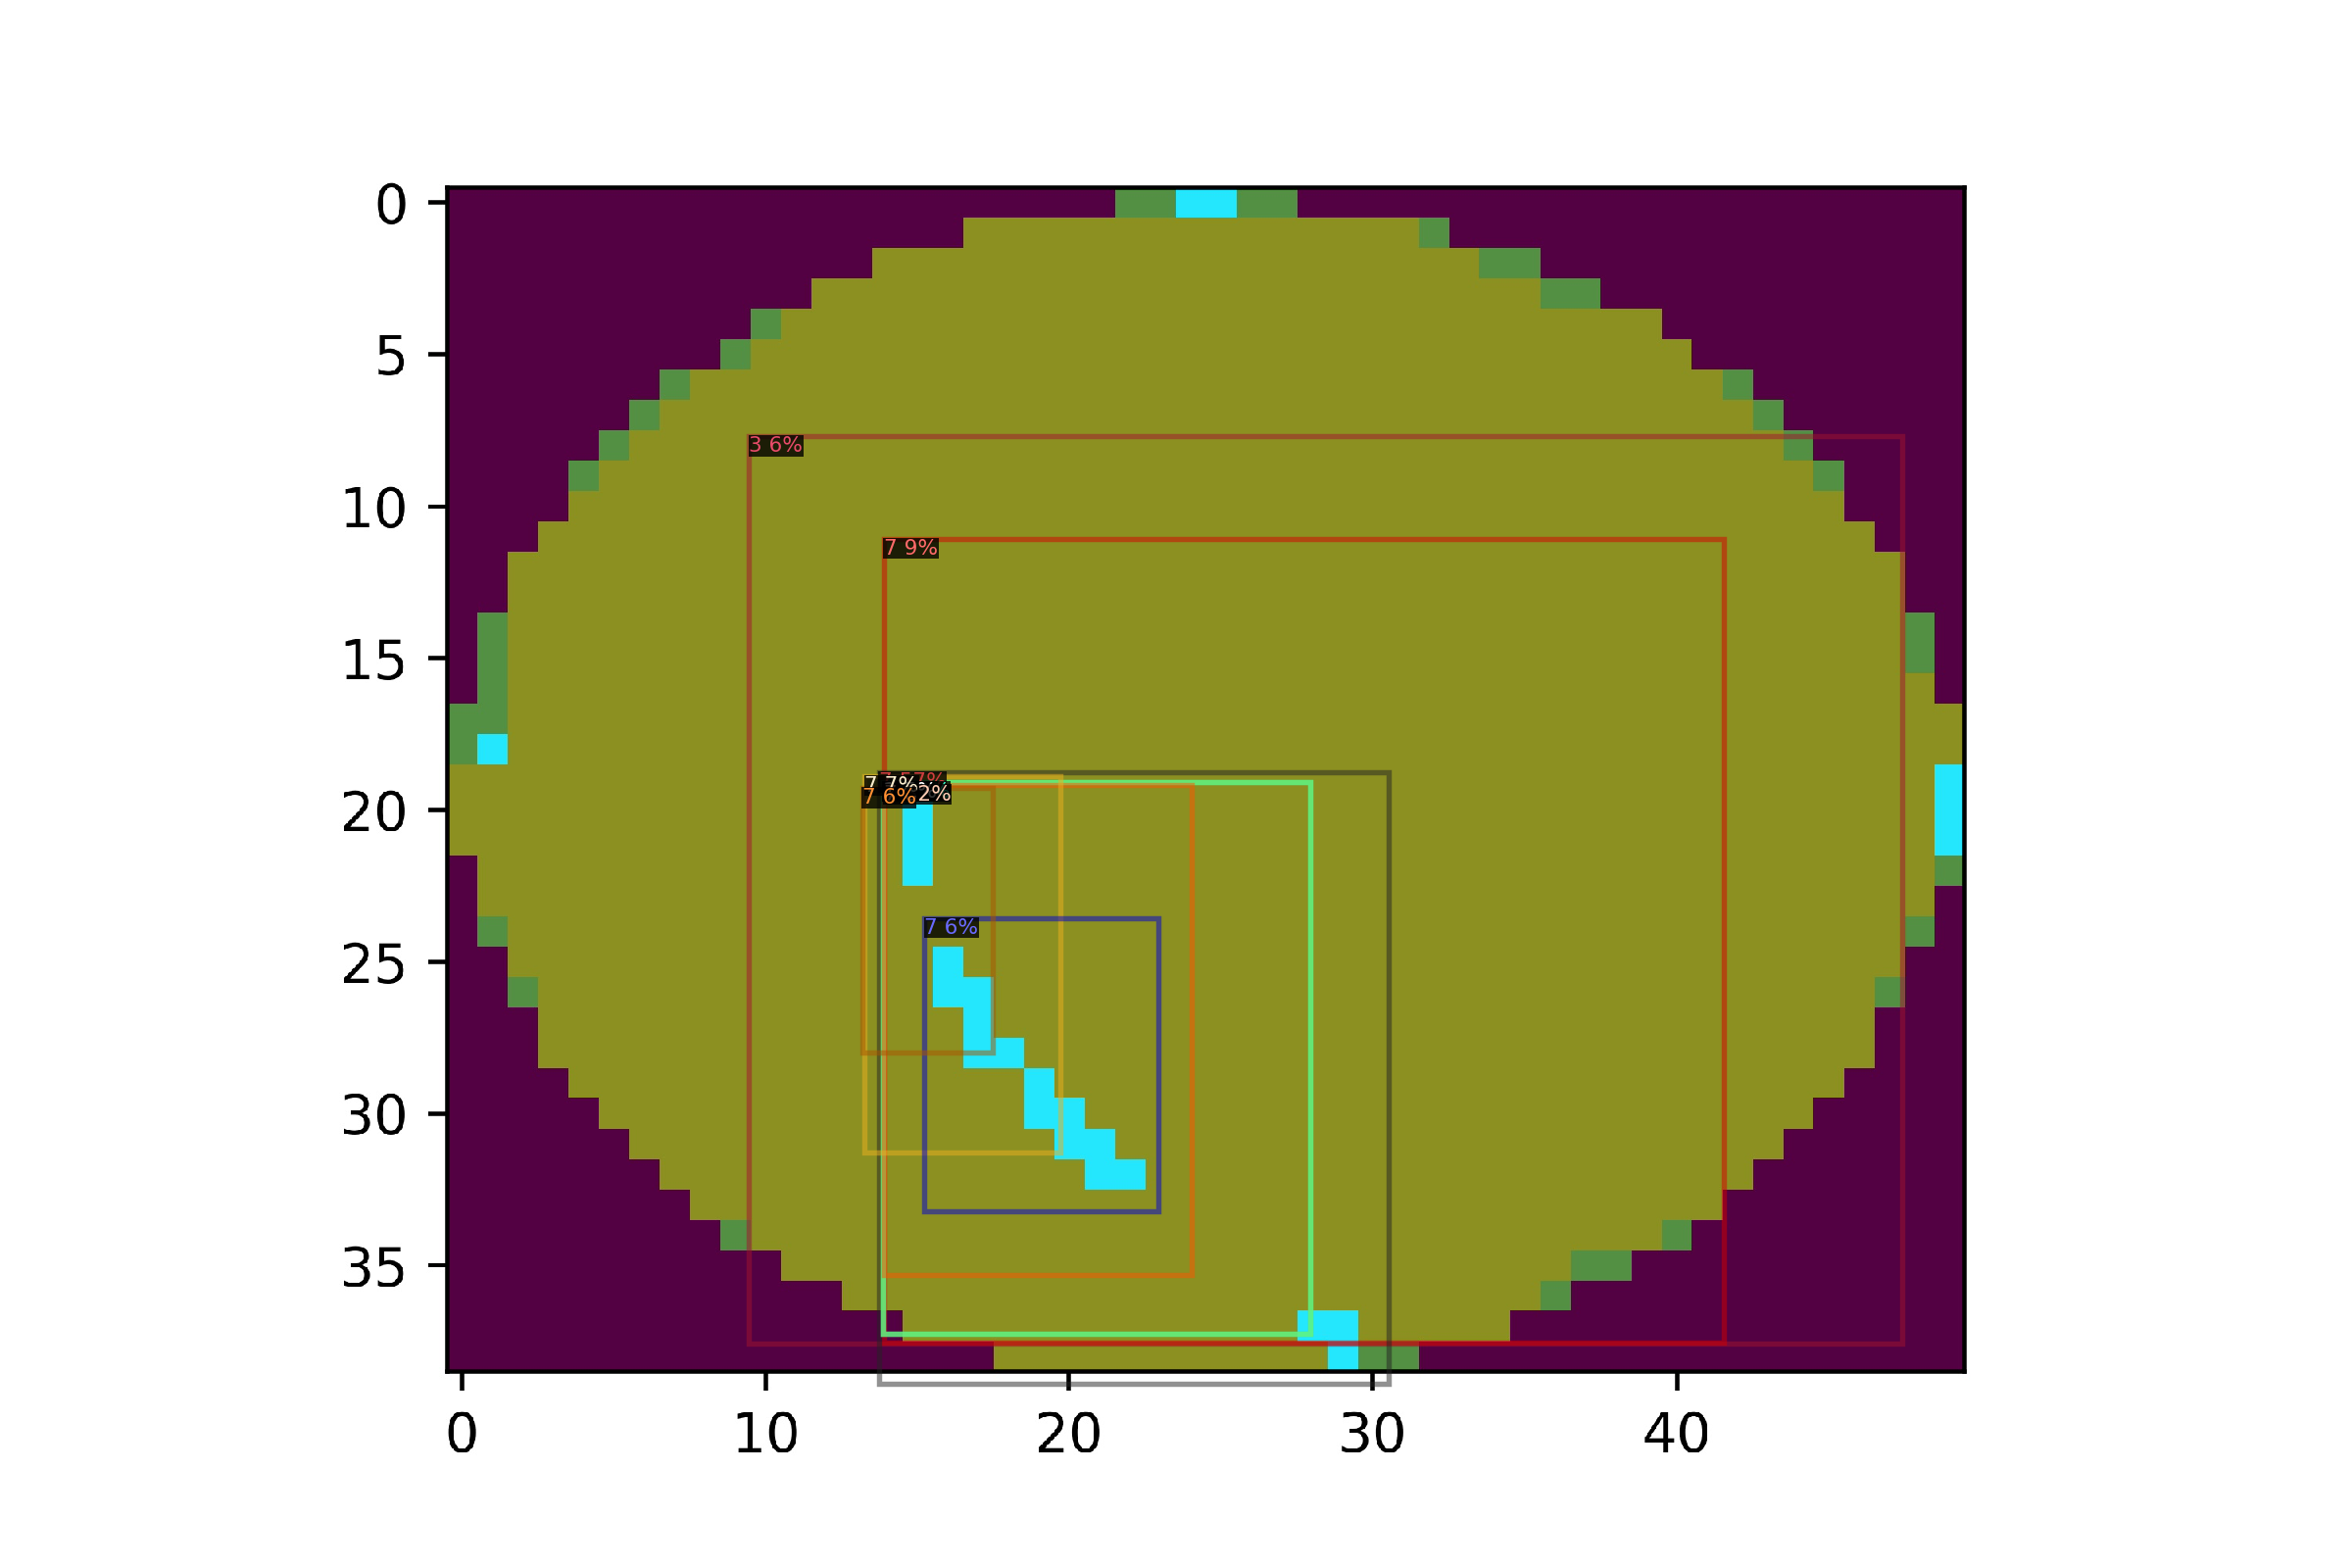

In [22]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/testimg/scratch232.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

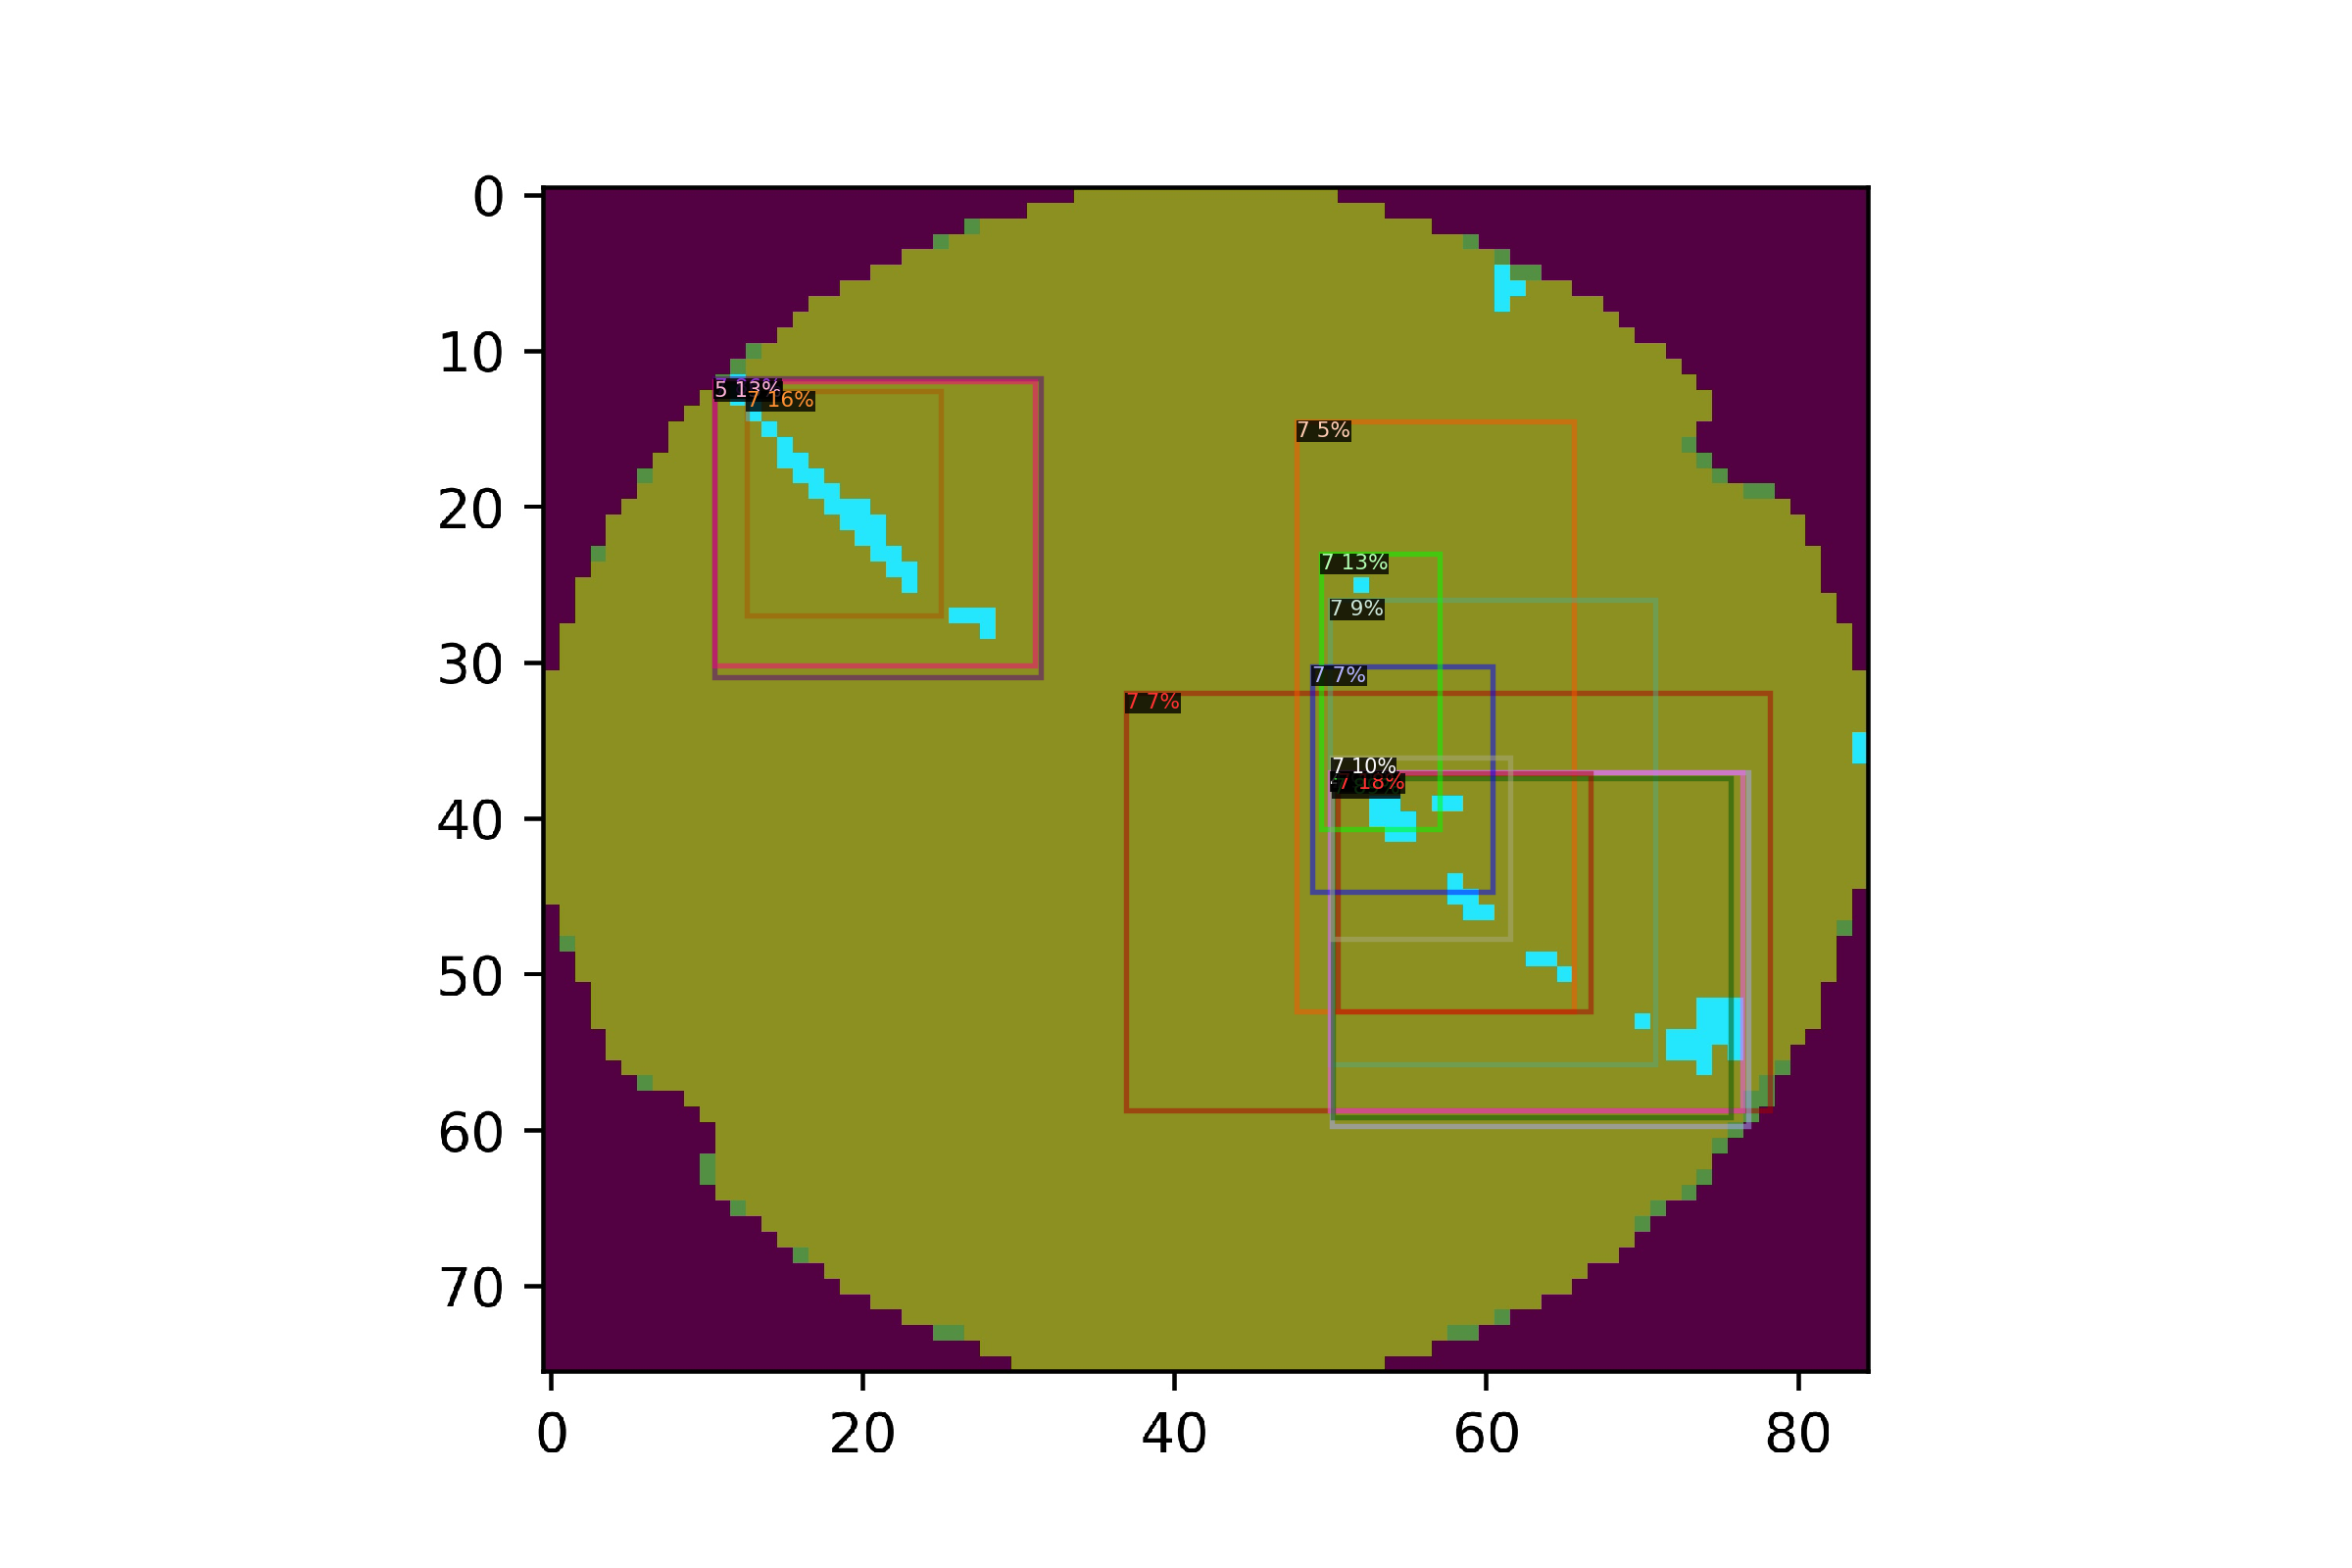

In [23]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/testimg/scratch249.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

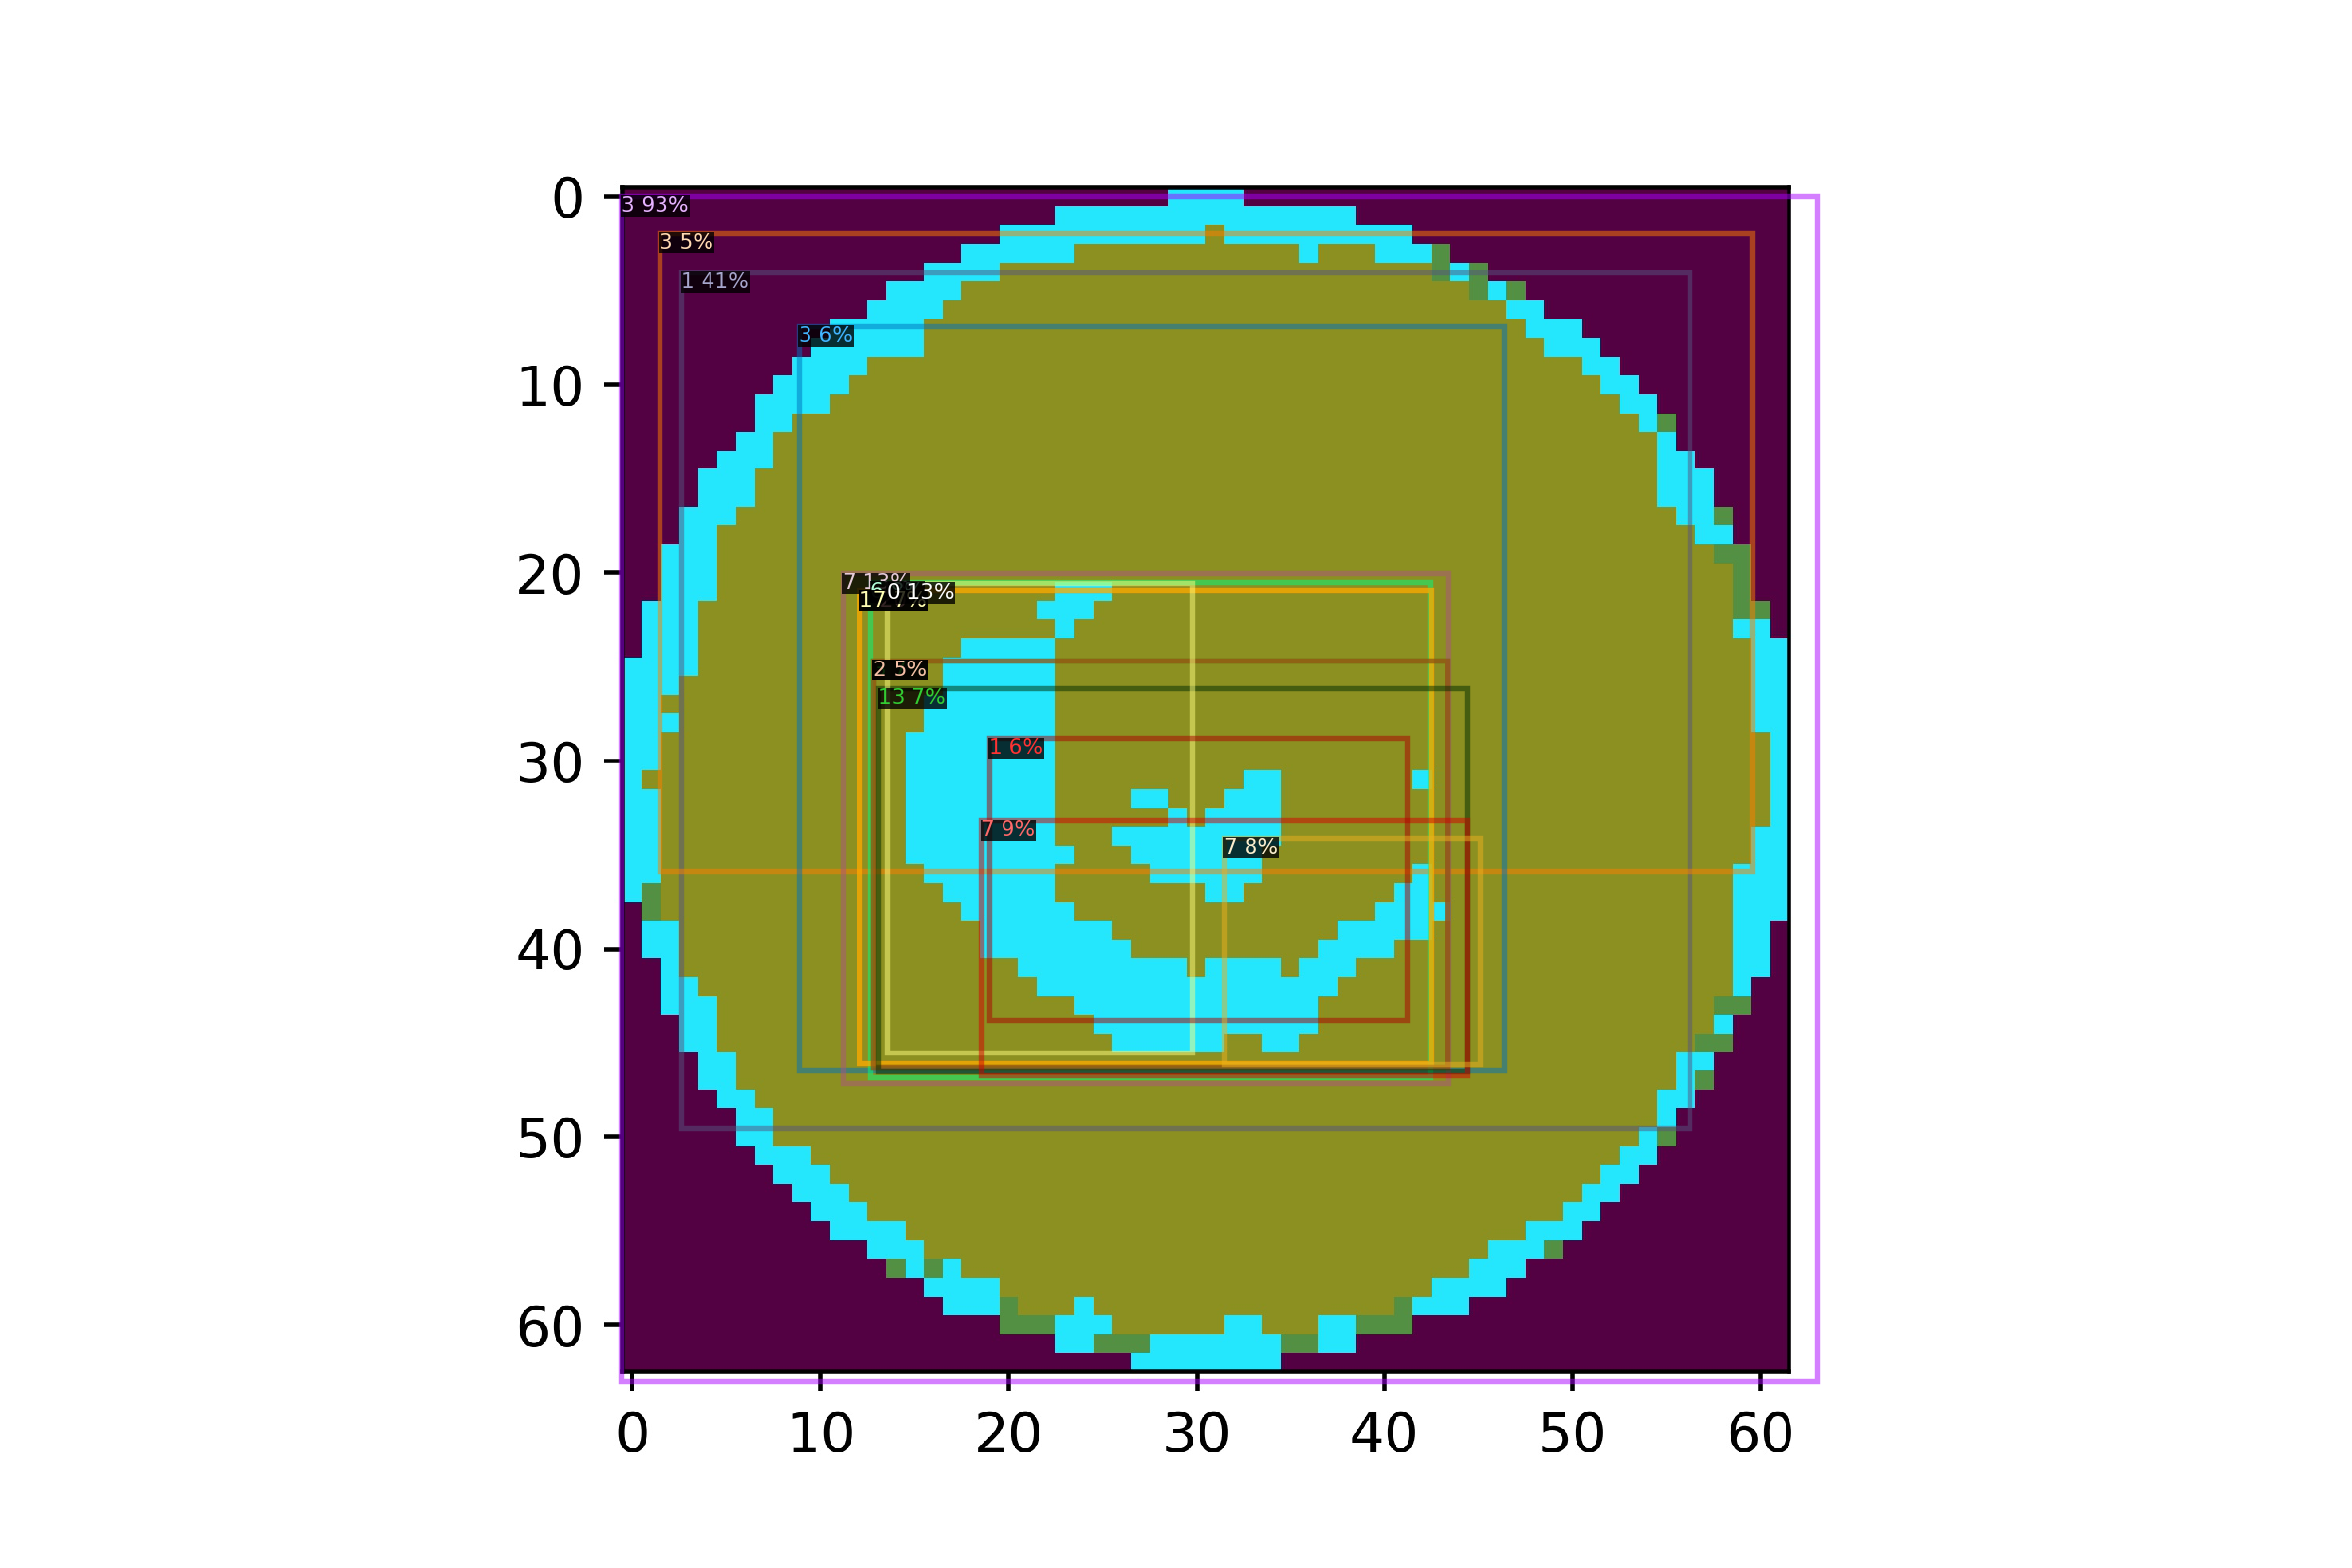

In [24]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/testimg/edge_ring239.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                   scale=0.8
    )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

Center :0, Donut : 1, Edge-Loc : 2, Edge-Ring : 3, Loc : 4, Near-full : 5,Random : 6,Scratch : 7, none : 8

In [25]:
outputs

{'instances': Instances(num_instances=15, image_height=2000, image_width=3000, fields=[pred_boxes: Boxes(tensor([[ 792.8513,  249.8441, 2316.8726, 1761.0562],
         [ 869.0082,  347.3814, 2155.3269, 1438.9690],
         [1096.7820,  753.1198, 1825.4563, 1355.8180],
         [1130.9934,  743.8230, 1520.5957, 1342.1423],
         [1074.8557,  731.7673, 1847.8540, 1381.4280],
         [1251.6865, 1046.7874, 1871.2590, 1371.8365],
         [1561.1611, 1068.7219, 1887.3452, 1357.8252],
         [1110.4139,  742.4666, 1824.0967, 1374.0284],
         [1120.2512,  878.0696, 1871.7734, 1366.1750],
         [1113.7449,  842.3108, 1846.6970, 1361.6742],
         [1096.7820,  753.1198, 1825.4563, 1355.8180],
         [1018.9043,  416.1913, 1918.3593, 1365.4109],
         [1261.3246,  941.5050, 1794.5088, 1301.7720],
         [1113.7449,  842.3108, 1846.6970, 1361.6742],
         [ 841.3164,  296.9642, 2235.3325, 1111.7238]], device='cuda:0')), scores: tensor([0.9263, 0.4056, 0.2048, 0.1306, 0.1